In [1]:
using OptimalApplication
using Random
using Plots
using DataFrames

accentcolor = :olivedrab

:olivedrab

## Comparative statics example

In [2]:
mkt = Market([0.39, 0.33, 0.24, 0.24, 0.05, 0.03, 0.1, 0.12],
             collect(range(start=200, step=50, length=8)),
             8)

apporder, v = applicationorder(mkt, verbose=true, datastructure=:heap)

invpermapporder = invperm(apporder)

C = [1, 2, 3, 4, 5, 6, 7, 8]
f = [0.39, 0.33, 0.24, 0.24, 0.05, 0.03, 0.1, 0.12]
t = [200, 250, 300, 350, 400, 450, 500, 550]
ft= [78.0, 82.5, 72.0, 84.0, 20.0, 13.5, 50.0, 66.0]
C = [1, 2, 3, 5, 6, 7, 8]
f = [0.39, 0.33, 0.24, 0.05, 0.03, 0.1, 0.12]
t = [152.0, 190.0, 228.0, 316.0, 366.0, 416.0, 466.0]
ft= [59.28, 62.7, 54.72, 15.8, 10.98, 41.6, 55.919999999999995]
C = [1, 3, 5, 6, 7, 8]
f = [0.39, 0.24, 0.05, 0.03, 0.1, 0.12]
t = [101.83999999999999, 165.3, 253.3, 303.3, 353.3, 403.3]
ft= [39.7176, 39.672000000000004, 12.665000000000001, 9.099, 35.330000000000005, 48.396]
C = [1, 3, 5, 6, 7]
f = [0.39, 0.24, 0.05, 0.03, 0.1]
t = [89.61919999999999, 145.464, 222.90400000000002, 266.904, 310.904]
ft= [34.951488, 34.911359999999995, 11.145200000000003, 8.00712, 31.090400000000002]
C = [3, 5, 6, 7]
f = [0.24, 0.05, 0.03, 0.1]
t = [110.512512, 187.952512, 231.952512, 275.952512]
ft= [26.52300288, 9.397625600000001, 6.95857536, 27.595251200000003]
C = [3, 5, 6]
f = [0.24, 0.05, 0.03]
t = [

8-element Vector{Int64}:
 4
 2
 6
 1
 7
 8
 5
 3

In [3]:
println(apporder)

[4, 2, 8, 1, 7, 3, 5, 6]


In [4]:
df = DataFrame("f" => mkt.f, "t" => mkt.t, "order" => invpermapporder, "v" => v[invpermapporder])
#=
 Row │ f        t        order  v       
     │ Float64  Float64  Int64  Float64 
─────┼──────────────────────────────────
   1 │    0.39    200      4  230.047
   2 │    0.33    250      2  146.7
   3 │    0.24    300      6  281.513
   4 │    0.24    350      1   84.0
   5 │    0.05    400      7  288.778
   6 │    0.03    450      8  294.106
   7 │    0.1     500      5  257.643
   8 │    0.12    550      3  195.096
=#
df

,f,t,order,v
,Float64,Int64,Int64,Float64
1,0.39,200,4,230.047
2,0.33,250,2,146.7
3,0.24,300,6,281.513
4,0.24,350,1,84.0
5,0.05,400,7,288.778
6,0.03,450,8,294.106
7,0.1,500,5,257.643
8,0.12,550,3,195.096


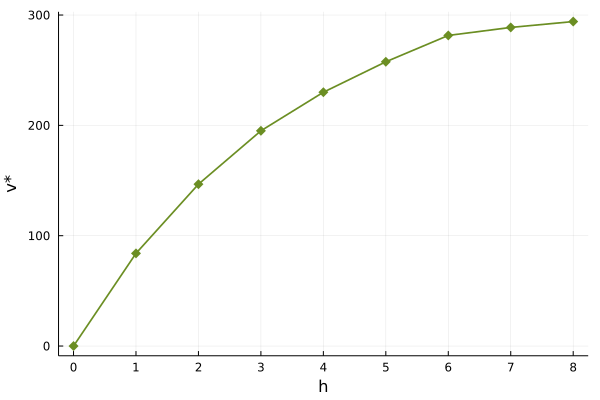

In [5]:
pl = plot(0:8, vcat(0, v), legend = false, size = (600, 400), xlabel = "h", ylabel = "v*", lw = 1.7, color = accentcolor, xticks = 0:8, marker = :diamond, msc = :auto, ms = 5)

In [6]:
savefig(pl, "h_v-example.pdf")
savefig(pl, "h_v-example.png")

## Sample random market

In [7]:
function make_correlated_market(m)
    A = 10
    t = ceil.(Int, 10 * randexp(m))
    sort!(t)
    f = inv.(t .+ 10 * rand(m))
    g = rand(5:10, m)
    H = sum(g) ÷ 2
    return f, t, g, H
end

randVCM(m) = VariedCostsMarket(make_correlated_market(m)...)
function randSCM(m)
    f, t, g, H = make_correlated_market(m)
    return SameCostsMarket(f, t, m ÷ 2)
end

randSCM (generic function with 1 method)

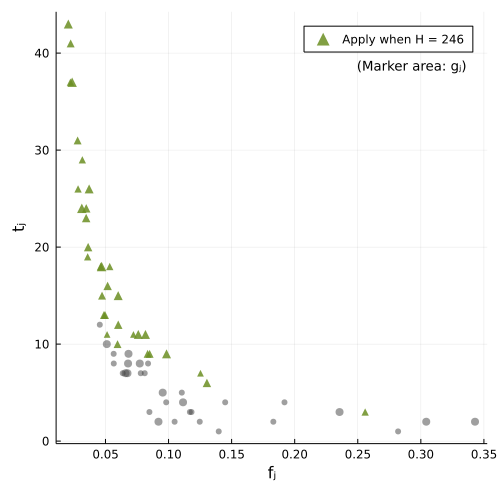

In [8]:
m = 64
mkt = randVCM(m)

X, v = optimalportfolio_dynamicprogram(mkt)

nX = setdiff(1:m, X)

scal = 1.5
pl = plot(size = (500, 500), xlabel = "fⱼ", ylabel = "tⱼ", legend = :topright)
scatter!(pl, mkt.f[nX], mkt.t[nX], ms = scal * sqrt.(mkt.g[nX]), c = :gray25, msc = :auto, ma = 0.5, label = nothing)
scatter!(pl, mkt.f[X], mkt.t[X], m = :utriangle, ms = scal * sqrt.(mkt.g[X]), c = accentcolor, msc = :auto, ma = 0.85, label = "Apply when H = $(mkt.H)")
annotate!(pl, [(maximum(mkt.f), 0.9 * maximum(mkt.t), text("(Marker area: gⱼ)  ", 9, :right))])

In [9]:
savefig(pl, "samplemarket.pdf")
savefig(pl, "samplemarket.png")